In [58]:
#  Setup & imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [59]:
#  Load dataset and inspect
path = "/content/titanic _data.csv"   # your uploaded file
df = pd.read_csv(path)

In [60]:
# Quick checks
print("Shape (rows, cols):", df.shape)
display(df.head())         # first 5 rows

Shape (rows, cols): (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
display(df.info())         # types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [62]:
display(df.describe())     # numeric summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
display(df.isnull().sum().sort_values(ascending=False))   # missing counts per column

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [64]:
#  Show column names and value counts for key columns
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [65]:
# Example: check unique values of some categorical columns
for col in ['Pclass','Sex','Embarked','Survived']:
    if col in df.columns:
        print("\nValue counts for", col)
        display(df[col].value_counts(dropna=False))


Value counts for Pclass


,count
Pclass,
3,491
1,216
2,184



Value counts for Sex


,count
Sex,
male,577
female,314



Value counts for Embarked


,count
Embarked,
S,644
C,168
Q,77
NaN,2



Value counts for Survived


,count
Survived,
0,549
1,342


Handle missing values

In [66]:
# Fill Embarked with mode if exists
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [67]:
#  Create HasCabin flag (1 if cabin info exists else 0), then drop Cabin text
if 'Cabin' in df.columns:
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    # keep HasCabin but drop the verbose Cabin string (optional)
    df = df.drop(columns=['Cabin'])

In [68]:
#  Impute Age using median grouped by Pclass and Sex (if Age exists)
if 'Age' in df.columns and 'Pclass' in df.columns and 'Sex' in df.columns:
    median_ages = df.groupby(['Pclass','Sex'])['Age'].median()
    def impute_age(row):
        if pd.isnull(row['Age']):
            return median_ages.loc[row['Pclass'], row['Sex']]
        return row['Age']
    df['Age'] = df.apply(impute_age, axis=1)



In [69]:
# Optional: drop Ticket and Name if not needed for analysis
for col in ['Ticket','Name']:
    if col in df.columns:
        # comment out the next line if you want to keep them
        df = df.drop(columns=[col])

In [70]:
#  Final check
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
HasCabin,0


Fix data types & create useful categories

In [71]:
#  Convert types & create derived columns
if 'Pclass' in df.columns:
    df['Pclass'] = df['Pclass'].astype('category')

if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].astype(int)

In [72]:
# Example: create Age group (useful for grouping / visualization)
if 'Age' in df.columns:
    bins = [0, 12, 20, 40, 60, 120]
    labels = ['Child','Teen','Adult','MiddleAge','Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

Pandas examples: selection, filtering, loc/iloc, groupby

In [73]:
# Selection & filtering examples

# Select columns of interest
cols = [c for c in ['PassengerId','Survived','Pclass','Sex','Age','Fare','Embarked','HasCabin','AgeGroup'] if c in df.columns]
display(df[cols].head())


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,AgeGroup
0,1,0,3,male,22.0,7.2500,S,0,Adult
1,2,1,1,female,38.0,71.2833,C,1,Adult
2,3,1,3,female,26.0,7.9250,S,0,Adult
3,4,1,1,female,35.0,53.1000,S,1,Adult
4,5,0,3,male,35.0,8.0500,S,0,Adult


In [74]:
# Filter: passengers older than 30 in first class
if {'Age','Pclass'}.issubset(df.columns):
    over_30_first = df[(df['Age'] > 30) & (df['Pclass'] == 1)]
    print("Count of >30 in Pclass 1:", over_30_first.shape[0])


Count of >30 in Pclass 1: 155


In [75]:
# .loc example: rows with index 0..4 and "Name" (if existed) - adjusted to present columns
print("\nUsing .loc to get first 5 passenger rows for selected cols:")
display(df.loc[df.index[:5], cols])



Using .loc to get first 5 passenger rows for selected cols:


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,AgeGroup
0,1,0,3,male,22.0,7.2500,S,0,Adult
1,2,1,1,female,38.0,71.2833,C,1,Adult
2,3,1,3,female,26.0,7.9250,S,0,Adult
3,4,1,1,female,35.0,53.1000,S,1,Adult
4,5,0,3,male,35.0,8.0500,S,0,Adult


In [76]:
# .iloc example: first 5 rows, first 4 columns by position
print("\nUsing .iloc to get first 5 rows and first 4 columns by index positions:")
display(df.iloc[0:5, 0:4])


Using .iloc to get first 5 rows and first 4 columns by index positions:


,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male


In [77]:
# Groupby & aggregate - survival rates
if {'Pclass','Sex','Survived'}.issubset(df.columns):
    surv_by_class_sex = df.groupby(['Pclass','Sex'])['Survived'].agg(['mean','count']).rename(columns={'mean':'survival_rate','count':'n'})
    display(surv_by_class_sex)

/tmp/ipython-input-590615463.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class_sex = df.groupby(['Pclass','Sex'])['Survived'].agg(['mean','count']).rename(columns={'mean':'survival_rate','count':'n'})


survival_rate    n
Pclass Sex                       
1      female       0.968085   94
       male         0.368852  122
2      female       0.921053   76
       male         0.157407  108
3      female       0.500000  144
       male         0.135447  347

In [78]:
# Aggregation example: mean Fare & Age by Embarked
if {'Embarked','Fare','Age'}.issubset(df.columns):
    display(df.groupby('Embarked')[['Fare','Age']].agg(['mean','median','count']))

Fare                     Age             
               mean median count       mean median count
Embarked                                                
C         59.954144  29.70   168  30.246548   27.0   168
Q         13.276030   7.75    77  25.116883   25.0    77
S         27.243651  13.00   646  29.293731   27.0   646

Small merge example

In [79]:
#  Merge example: add a short description for Pclass
if 'Pclass' in df.columns:
    pclass_lookup = pd.DataFrame({
        'Pclass': pd.Categorical([1,2,3]),
        'Pclass_desc': ['Upper','Middle','Lower']
    })
    df = df.merge(pclass_lookup, on='Pclass', how='left')
    display(df[['Pclass','Pclass_desc']].drop_duplicates())


,Pclass,Pclass_desc
0,3,Lower
1,1,Upper
9,2,Middle


NumPy section

In [80]:
# NumPy basics with numeric columns
numeric_cols = [c for c in ['Age','Fare','Survived','HasCabin'] if c in df.columns]
num_arr = df[numeric_cols].to_numpy()
print("NumPy array shape:", num_arr.shape, "dtype:", num_arr.dtype)


NumPy array shape: (891, 4) dtype: float64


In [81]:
# Column-wise extraction (Age, Fare)
if 'Age' in df.columns and 'Fare' in df.columns:
    age = num_arr[:, numeric_cols.index('Age')]
    fare = num_arr[:, numeric_cols.index('Fare')]


In [82]:
    mean_age = np.mean(age)
    median_age = np.median(age)
    std_age = np.std(age, ddof=0)   # population std
    print("Age - mean:", mean_age, "median:", median_age, "std:", std_age)

Age - mean: 29.11242424242424 median: 26.0 std: 13.2969559718967


In [83]:
# Broadcasting example: min-max normalize fare
fare_min, fare_max = fare.min(), fare.max()
fare_norm = (fare - fare_min) / (fare_max - fare_min)
print("Fare normalized range:", fare_norm.min(), "-", fare_norm.max())

Fare normalized range: 0.0 - 1.0


In [84]:
 # Boolean indexing: number of passengers with fare > 50
print("Passengers with Fare > 50:", np.sum(fare > 50))

Passengers with Fare > 50: 160


Matplotlib visualizations

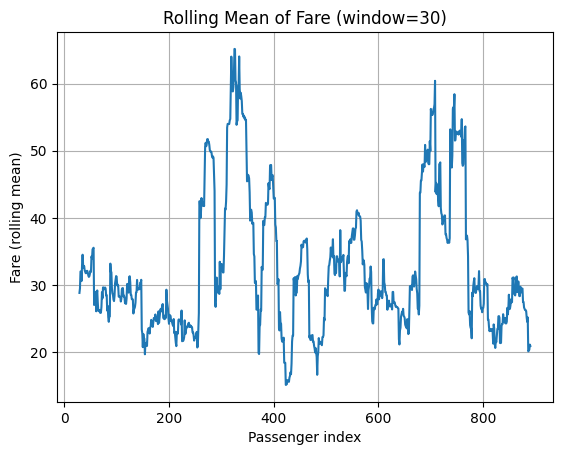

In [85]:

#  Line: rolling mean of Fare (trend)
plt.figure()
df['Fare'].reset_index(drop=True).rolling(window=30).mean().plot()
plt.title('Rolling Mean of Fare (window=30)')
plt.xlabel('Passenger index')
plt.ylabel('Fare (rolling mean)')
plt.grid(True)
plt.show()

/tmp/ipython-input-1533045762.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Pclass')['Survived'].sum().plot(kind='bar')


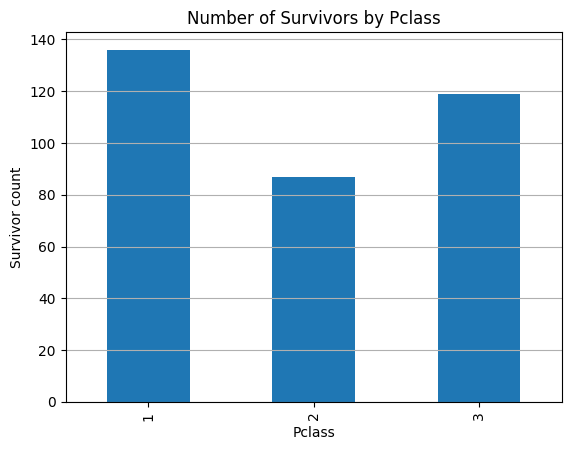

In [86]:
#  Bar: number of survivors by Pclass
if 'Pclass' in df.columns and 'Survived' in df.columns:
    plt.figure()
    df.groupby('Pclass')['Survived'].sum().plot(kind='bar')
    plt.title('Number of Survivors by Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('Survivor count')
    plt.grid(axis='y')
    plt.show()

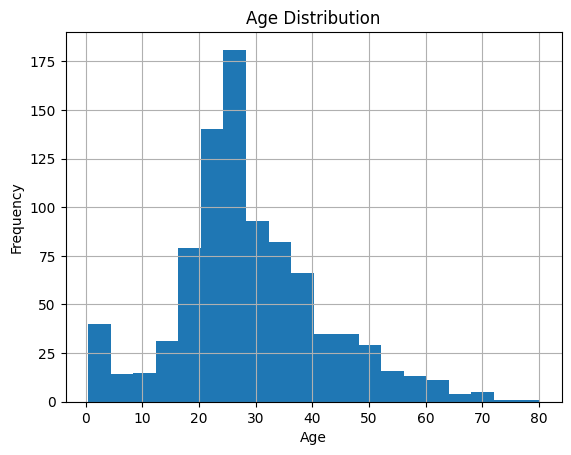

In [87]:
# Histogram: Age distribution
if 'Age' in df.columns:
    plt.figure()
    plt.hist(df['Age'], bins=20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

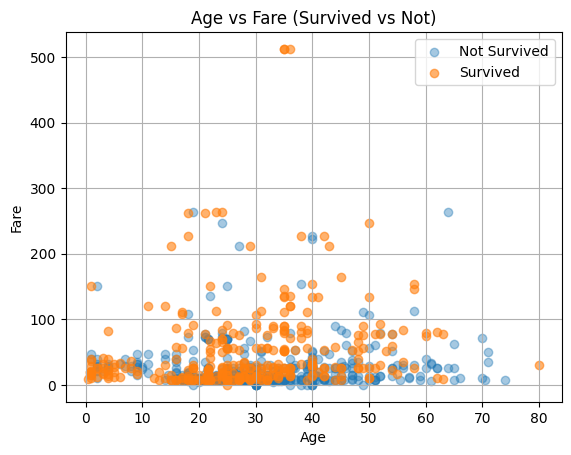

In [88]:
#  Scatter: Age vs Fare colored by Survived
if {'Age','Fare','Survived'}.issubset(df.columns):
    plt.figure()
    survived_mask = df['Survived'] == 1
    plt.scatter(df.loc[~survived_mask,'Age'], df.loc[~survived_mask,'Fare'], alpha=0.4, label='Not Survived')
    plt.scatter(df.loc[survived_mask,'Age'], df.loc[survived_mask,'Fare'], alpha=0.6, label='Survived')
    plt.title('Age vs Fare (Survived vs Not)')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 640x480 with 0 Axes>

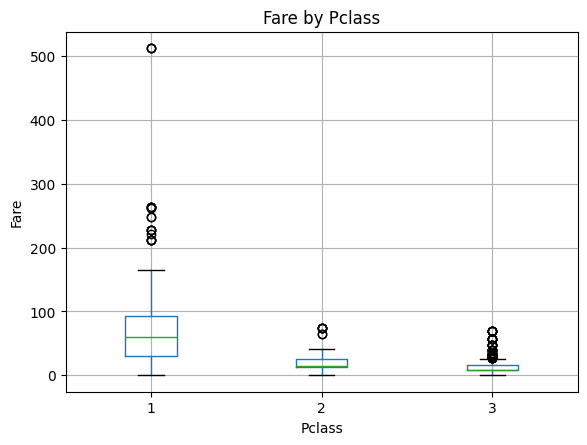

In [89]:
#  Boxplot: Fare by Pclass (shows outliers & spread)
if 'Fare' in df.columns and 'Pclass' in df.columns:
    plt.figure()
    df.boxplot(column='Fare', by='Pclass')
    plt.title('Fare by Pclass')
    plt.suptitle('')
    plt.xlabel('Pclass')
    plt.ylabel('Fare')
    plt.grid(True)
    plt.show()

Seaborn visualizations

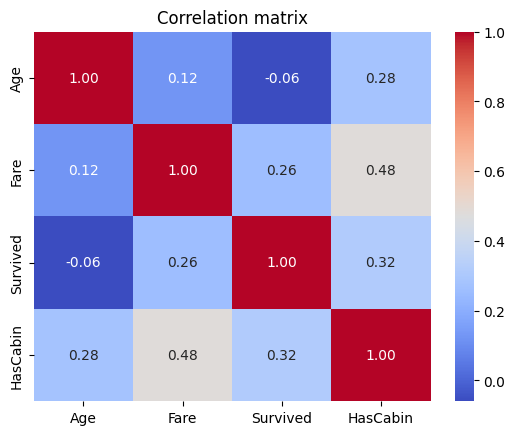

In [90]:
#  Heatmap of correlations (numeric columns)
num_for_corr = [c for c in ['Age','Fare','Survived','HasCabin'] if c in df.columns]
if len(num_for_corr) >= 2:
    plt.figure()
    corr = df[num_for_corr].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation matrix')
    plt.show()

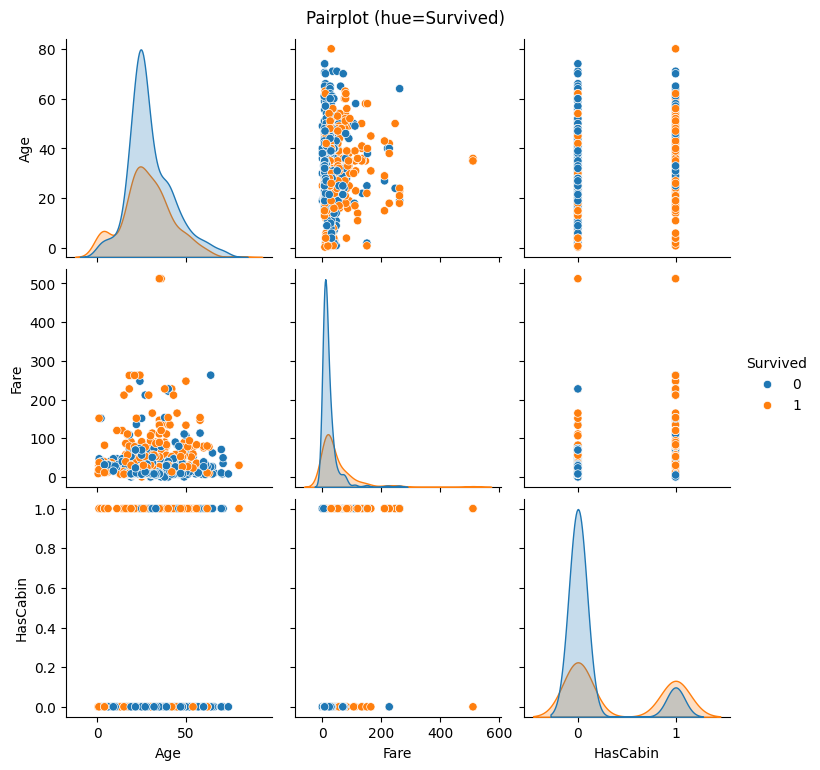

In [91]:
#  Pairplot for selected numeric columns colored by Survived (if Survived exists)
pair_cols = [c for c in ['Age','Fare','HasCabin'] if c in df.columns]
if 'Survived' in df.columns and len(pair_cols) >= 1:
    sns.pairplot(df[pair_cols + ['Survived']], hue='Survived', diag_kind='kde', height=2.5)
    plt.suptitle('Pairplot (hue=Survived)', y=1.02)
    plt.show()

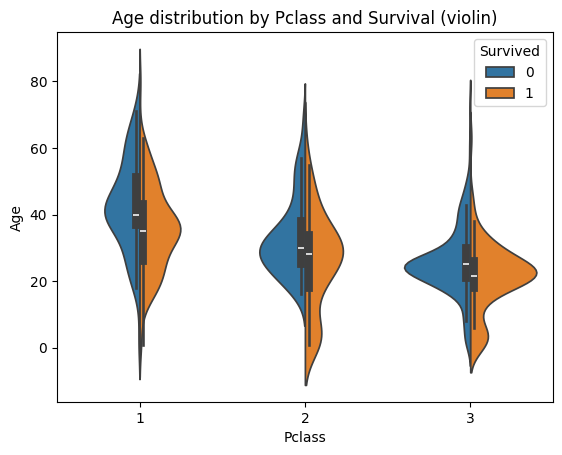

In [92]:
#  Violin plot: Age distribution by Pclass and survival (if columns exist)
if {'Pclass','Age','Survived'}.issubset(df.columns):
    plt.figure()
    sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
    plt.title('Age distribution by Pclass and Survival (violin)')
    plt.show()

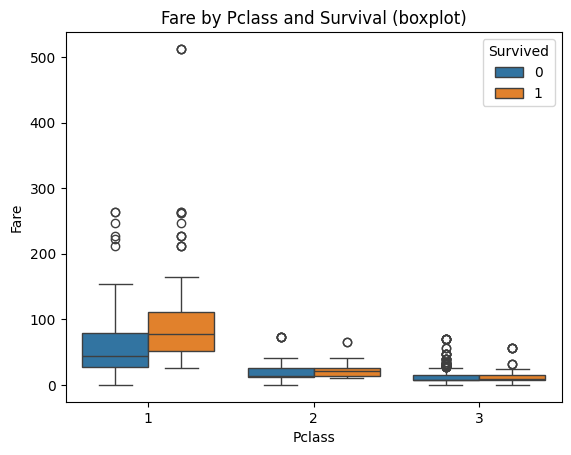

In [93]:

#  Boxplot alternative: Fare by Pclass and Survival
if {'Pclass','Fare','Survived'}.issubset(df.columns):
    plt.figure()
    sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
    plt.title('Fare by Pclass and Survival (boxplot)')
    plt.show()

Save cleaned dataset and plots

In [94]:
#  Save cleaned dataset and one example plot
clean_path = "/content/train_cleaned.csv" # Changed path to /content/
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)

Saved cleaned dataset to: /content/train_cleaned.csv


In [95]:
# Example: save survival counts bar plot as PNG
if 'Survived' in df.columns:
    plt.figure()
    df['Survived'].value_counts().plot(kind='bar')
    plt.title('Survived Counts')
    plt.savefig("/content/survived_counts.png", dpi=200, bbox_inches='tight')
    plt.close()
    print("Saved example plot to: /content/survived_counts.png")

Saved example plot to: /content/survived_counts.png


THE **END**